# <center>Algunas herramientas adicionales</center>

Antes de avanzar con los modelos de ML, a continuación se realiza un breve análisis de algunas herramientas de uso común en el ámbito del ML como lo son la estandarización de los datos y mejores prácticas de imputación.

## Más estrategias para el manejo de valores nulos
Existen múltiples estrategias para realizar el proceso de imputación. Las más simples de ellas no suelen considerar la relación existente entre diferentes características del conjunto de datos como SimpleImputer, otras, más avanzadas, toman en cuenta dicha relación, tales como KNNImputer  e IterativeImputer, las cuales son métodos multivariados, pues requieren más de una característica para poder realizar la imputación. 

In [1]:
import numpy as np
import pandas as pd

# !pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)
#%matplotlib notebook

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [3]:
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
# Una pequeña limpieza
# Columnas del DataFrame
df.columns = df.columns.str.replace("-", "_")
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_L/100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

In [5]:
# Las columnas con algún valor nulo
df.isna().sum()[df.isna().sum()>=1]

stroke               4
horsepower_binned    1
dtype: int64

Con el fin de mostrar mejor las estrategias para la imputación, a continuación se crearán más valores nulos de manera aleatoria en el DataFrame para la columna *stroke*.

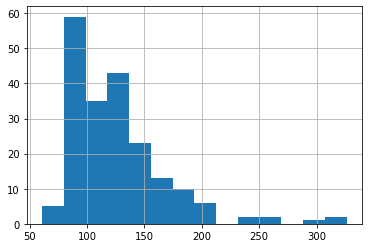

In [6]:
# Distribución para la característica (feature) a estudiar
feature = "engine_size"
df[feature].hist(bins=int(np.sqrt(df.shape[0])))
plt.show()

A continuación, para poder tener algunos valores nulos con los que trabajar, se elige aleatoriamente el 10% de los índices del DataFrame para la columna elegida (feature).

In [7]:
np.random.seed(1234)
idx_na = np.random.choice(df.index, size=int(0.1*df.shape[0]))
idx_na

array([ 47,  38,  53, 116, 152, 143, 177,  23, 154,  30, 171, 158, 124,
        26, 118, 186, 120, 112,  69,  80])

In [8]:
# Se asignan valores nulos a los índices elegidos (para feature)
df.loc[idx_na, feature] = np.nan

Una buena idea sería poder visualizar los valores nulos en cada columna, para esto se puede utilizar la librería missingno.

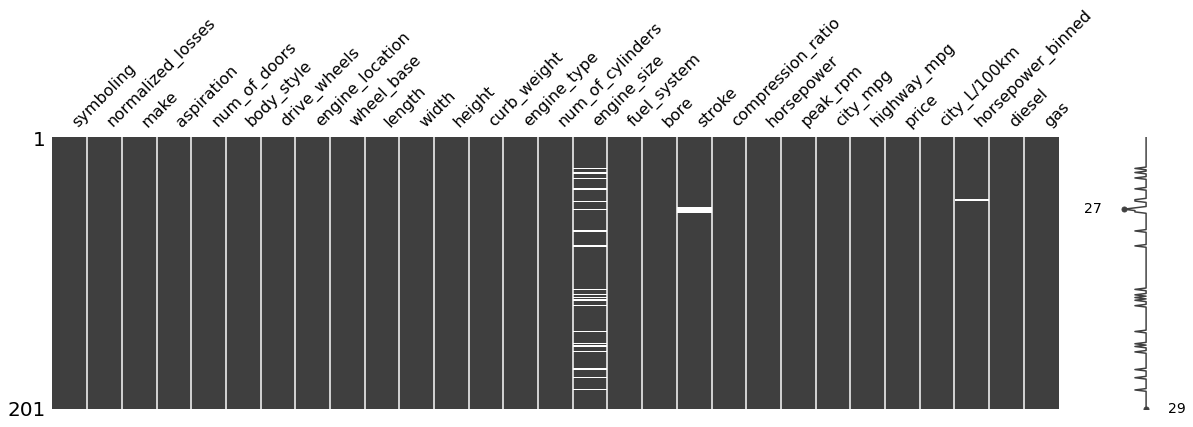

In [9]:
msno.matrix(df, sparkline=True, figsize=(20,5) )
plt.show()

### SimpleImputer: Imputando con la media, moda, mediana o valores constantes

Esta es una de las estrategias de imputación más sencillas y consiste en reemplazar todos los valores faltantes por un mismo valor. Se puede utilizar la media, moda, mediana o valores constantes.

In [10]:
# Instanciando el SimpleImputer
simple_imputer = SimpleImputer(strategy="mean")
print(f"{feature} {simple_imputer.strategy} = {df[feature].mean()}")

engine_size mean = 127.79558011049724


In [11]:
# Estimación y transformación
feature_tsi = pd.DataFrame(simple_imputer.fit_transform(df[feature].values.reshape(-1,1)))
feature_tsi

,0
0,130.0
1,130.0
2,152.0
3,109.0
4,136.0
...,...
196,141.0
197,141.0
198,173.0
199,145.0


In [12]:
# Todos los valores nulos se reemplazan utilizando la estrategia indicada
feature_tsi.loc[idx_na]

,0
47,127.79558
38,127.79558
53,127.79558
116,127.79558
152,127.79558
143,127.79558
177,127.79558
23,127.79558
154,127.79558
30,127.79558


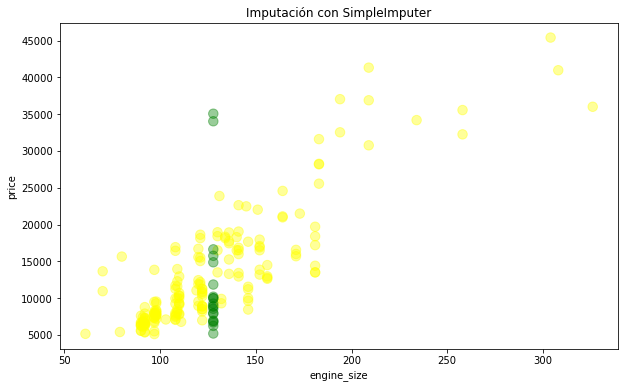

In [13]:
# Representación de la feature utilizada en relación con el precio
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=feature_tsi, y=df["price"],
           c=["green" if i==True else "yellow" for i in df[feature].isna()],
           alpha=0.4, s=90)

ax.set_xlabel(feature)
ax.set_title("Imputación con SimpleImputer")
ax.set_ylabel("price")
plt.show()

### K-Nearest Neighbour

Otra de las alternativas del módulo *impute* de sklearn es la utilización de K-Nearest Neighbour. Este método permite realizar la imputación utilizando la media de los K "vecinos" más cercanos al valor nulo en el conjunto de datos. Para poder determinar los K vecinos el algoritmo necesita un conjunto de datos con múltiples características. 

In [14]:
# Estimación y transformación
knn_imputer = KNNImputer(n_neighbors=5, weights="distance")
feature_tknn = pd.DataFrame( 
                    knn_imputer.fit_transform( df.loc[:, ["price", feature]] )
                            )
                           
feature_tknn = pd.DataFrame(feature_tknn.loc[:,1])

In [15]:
feature_tknn.loc[idx_na]

,1
47,78.553652
38,122.000000
53,120.707924
116,98.000000
152,100.044470
143,118.786844
177,133.892544
23,90.000000
154,92.000000
30,97.937758


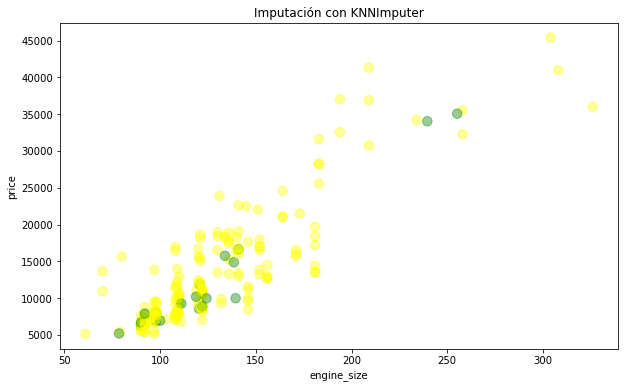

In [16]:
# Representación de la feature utilizada en relación con el precio
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=feature_tknn, y=df["price"],
           c=["green" if i==True else "yellow" for i in df[feature].isna()],
           alpha=0.4, s=90)

ax.set_xlabel(feature)
ax.set_title("Imputación con KNNImputer")
ax.set_ylabel("price")
plt.show()

### IterativeImputer
Uno de los métodos más relevantes a la hora de imputar valores nulos es IterativeImputer. Este método modela la feature con valores nulos (el target *y*) a partir de las demás features (*X*), para esto utiliza el parámetro *estimator* como método de regresión en cada iteración durante la imputación, utiliza Round Robin Fashion como estrategia para imputar. 

In [17]:
# IterativeImputer puede recibir un estimador para utilizar en cada iteración
# por defecto utiliza BayesianRidge
linear = LinearRegression()
iter_imputer  = IterativeImputer(estimator=linear)
feature_tIter = pd.DataFrame( 
                    iter_imputer.fit_transform( df.loc[:, ["price", feature]] )
                            )
                           
feature_tIter = pd.DataFrame(feature_tIter.loc[:,1])

In [18]:
feature_tIter.loc[idx_na]

,1
47,90.529548
38,107.247599
53,120.988463
116,103.180303
152,98.512990
143,113.444728
177,138.874487
23,95.265566
154,102.910066
30,98.132826


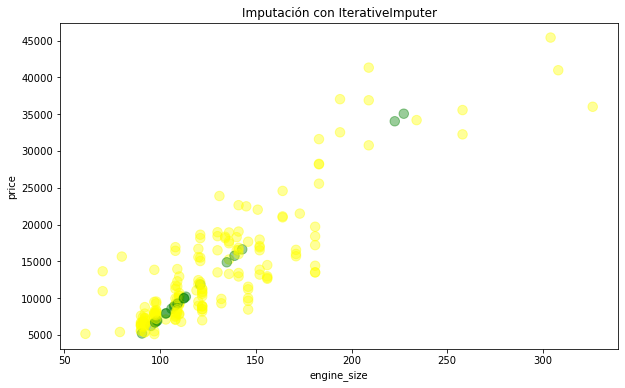

In [19]:
# Representación de la feature utilizada en relación con el precio
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=feature_tIter, y=df["price"],
           c=["green" if i==True else "yellow" for i in df[feature].isna()],
           alpha=0.4, s=90)

ax.set_xlabel(feature)
ax.set_title("Imputación con IterativeImputer")
ax.set_ylabel("price")
plt.show()

## Escalado de las features

Es habitual que se tengan características con valores muy contrastantes, unos muy altos y otros muy bajos, esto puede representar un problema para los algorítmos de ML. Por esta razón se hace necesario la existencia de herramientas que permitan re-escalar los valores de las features. 

El módulo sklearn.preprocessing provee múltiples métodos para realizar este procedimiento. A continuación algunas herramientas:

### Normalización  
Reescala la feature indicada a un rango entre 0 y 1, que se puede modificar utilizando el parámetro feature_range. 

$$
x'=\frac{x-x_{min}}{x_{max}-x_{min}}.
$$ 


In [20]:
# Procedimiento realizado para la normalización
(df[feature] - df[feature].min())/(df[feature].max() - df[feature].min())

0      0.260377
1      0.260377
2      0.343396
3      0.181132
4      0.283019
         ...   
196    0.301887
197    0.301887
198    0.422642
199    0.316981
200    0.301887
Name: engine_size, Length: 201, dtype: float64

In [21]:
# Normalización con MinMaxScaler
scaler_minMax    = MinMaxScaler()
scaled_feact_mm  = pd.DataFrame(scaler_minMax.fit_transform(df[[feature]]))
scaled_feact_mm

,0
0,0.260377
1,0.260377
2,0.343396
3,0.181132
4,0.283019
...,...
196,0.301887
197,0.301887
198,0.422642
199,0.316981


### Estandarización:
La estandarización consiste en reescalar los valores de la feature a unidades de su desviación estandar $\sigma$, de modo que la desviación estandar de la columna transformada iguala a uno y su media es cero. 
$$
    x'=\frac{x-\bar x}{\sigma}
$$

In [22]:
# Procedimiento realizado para la estandarización
(df[feature] - df[feature].mean())/(df[feature].std())

0      0.052784
1      0.052784
2      0.579565
3     -0.450053
4      0.196452
         ...   
196    0.316175
197    0.316175
198    1.082402
199    0.411953
200    0.316175
Name: engine_size, Length: 201, dtype: float64

In [23]:
scaler_stds = StandardScaler()
scaled_feact_stds = pd.DataFrame(scaler_stds.fit_transform(df[[feature]]))
scaled_feact_stds

,0
0,0.052930
1,0.052930
2,0.581173
3,-0.451301
4,0.196997
...,...
196,0.317052
197,0.317052
198,1.085405
199,0.413096


In [24]:
# Los datos estandarizados tendrán media de cero (o muy cercana) y desviación estandar de 1 (o muy cercana)
print(f"media={round(scaled_feact_stds.mean()[0],3)} std={round(scaled_feact_stds.std()[0],3)}")

media=-0.0 std=1.003


## Conversión de features categóricas a numéricas

Suele ser necesario convertir una columna de tipo categórico a numérica, hacer esto suele generar columnas adicionales dependiendo de la cantidad de características presentes en la columna. Sklearn ofrece múltiples opciones para realizar este procedimiento, aunque pandas también permite hacerlo por medio de sus dummies.

In [25]:
df.select_dtypes("O").columns

Index(['make', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system',
       'horsepower_binned'],
      dtype='object')

In [26]:
df.num_of_cylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

#### Conversión con pandas

In [27]:
pd.get_dummies(df.num_of_cylinders)

,eight,five,four,six,three,twelve,two
0,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
196,False,False,True,False,False,False,False
197,False,False,True,False,False,False,False
198,False,False,False,True,False,False,False
199,False,False,False,True,False,False,False


#### OneHotEncoder
Codifica las categorías generando una nueva columna para cada una con valores boleanos (True si la instancia contiene la categoría, False en caso contrario). 

In [28]:
encoder_oh = OneHotEncoder(sparse_output=False, dtype=int)
df_drive_wheels_ohe = pd.DataFrame(
                        encoder_oh.fit_transform(df[["num_of_cylinders"]]),
                        columns=encoder_oh.get_feature_names_out(["num_of_cylinders"]))

df_drive_wheels_ohe

,num_of_cylinders_eight,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
196,0,0,1,0,0,0,0
197,0,0,1,0,0,0,0
198,0,0,0,1,0,0,0
199,0,0,0,1,0,0,0


In [29]:
df.num_of_cylinders

0      four
1      four
2       six
3      four
4      five
       ... 
196    four
197    four
198     six
199     six
200    four
Name: num_of_cylinders, Length: 201, dtype: object

#### OrdinalEncoder
Codifica las categorías asignando un número a cada una.

In [30]:
encoder_ord = OrdinalEncoder()
df_drive_wheels_ord = pd.DataFrame(encoder_ord.fit_transform(df[["num_of_cylinders"]]), dtype=int)
df_drive_wheels_ord

,0
0,2
1,2
2,3
3,2
4,1
...,...
196,2
197,2
198,3
199,3


Un comportamiento deseado sería el uso de un diccionario que permita asignar a cada categoría un valor específico. Para esto es aconsejable el uso del método <code>apply</code> de los Dataframe.

In [31]:
func_dict = lambda x: {
                        'four':4,
                        'six':6,
                        'five':5,
                        'three':3,
                        'twelve':12,
                        'two':2,
                        'eight':8
                       }[x]

df[["num_of_cylinders"]].map(func_dict)

,num_of_cylinders
0,4
1,4
2,6
3,4
4,5
...,...
196,4
197,4
198,6
199,6
